## Introduction to TensorFlow and Keras


### TensorFlow

* conda install tensorflow
* https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-c-downloads

#### What is TensorFlow?

* TensorFlow is an open-source software library for dataflow programming across a range of tasks. 
* It is a symbolic math library, and is also used for machine learning applications such as neural networks. 

#### Why use TensorFlow?

* Very large and active community (compare with other machine learning frameworks such as H2O)
* Low-level and high-level interfaces to network training
* Tensorboard is the powerful visualization suite which is developed to track both the network topology and performance, making debugging even simpler.
* Written in Python (some parts in C++)
* Supports GPU. 

### Keras

* Keras is a simple-to-use but powerful deep learning library for Python
* A high-level, intuitive API for Deep Learning
* Easy to define neural networks, then automatically handles execution.
* A simple, modular interface which allows focus on learning and enables fast experimentation.

because

* It is actually a user-friendly wrapper on top of tensorflow
* It hides the low level details and make the deep learning easier to build
* But it also hides those fine tuning on tensorflow

**Because of its popularity and ease of use, keras is now bundled with tensorflow**

In [1]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

#### mnist is a dataset of 28x28 images of handwritten digits and their labels. Now we unpack images to x_train/x_test and labels to y_train/y_test

| ![mnist digits](MnistExamplesModified.png) |
|:--:|

#### Now we unpack images to x_train/x_test and labels to y_train/y_test

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()  
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

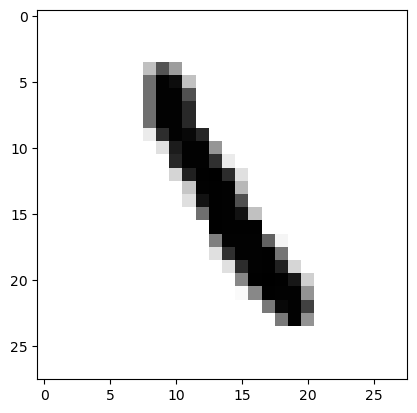

In [6]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

# protip - visually inspect your data
i = randint(0, x_train.shape[0])
pyplot.imshow(x_train[i], cmap='gray_r');

#### Normalize the data. In this case it is simply divide by 255 because the pixel has the value range [0, 255]

<font color='red'>Warning: the below is a wrong way to normalize train and test datasets seperately. They may end up with in different scale. But in this example it is ok because the min is 0 and max is 255 so the two datasets will have the same scale.</font>

In [7]:
x_train = normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = normalize(x_test, axis=1)  # scales data between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### build a basic feedforward model

In [8]:
model = Sequential()

#### takes our 28x28 and makes it 1x784 to feed the input layer

In [9]:
model.add(Flatten()) 

#### Build two hidden layers
* each layer is a simple fully-connected layer, 128 neurons
* The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start
* The output of relu is ƒ(x) = max(0,x).

In [10]:
#model.add(Dense(128, activation=tf.nn.relu)) 
#model.add(Dense(128, activation=tf.nn.relu))  
model.add(Dense(16, activation=tf.nn.relu)) 
model.add(Dense(16, activation=tf.nn.relu))  

#### Build the output layers. 10 units for 10 classes. Softmax for probability distribution
* softmax converts neural activation to probability of category

In [11]:
model.add(Dense(10, activation=tf.nn.softmax))  

### Same as tensorflow, you need to provide the loss function and optimizer. Here we use SGD and categorical_crossentropy.

#### A lot of losses to choose from at https://keras.io/api/losses/

* Probabilistic losses
    - BinaryCrossentropy class
    - CategoricalCrossentropy class
    - SparseCategoricalCrossentropy class
    - Poisson class
    - binary_crossentropy function
    - categorical_crossentropy function
    - sparse_categorical_crossentropy function
    - poisson function
    - KLDivergence class
    - kl_divergence function
    - etc...
    
* difference between sparse_categorical_crossentropy and categorical_crossentropy
    * categorical_crossentropy (cce) uses a one-hot array to calculate the probability,
    * sparse_categorical_crossentropy (scce) uses a category index
    
### Available optimizers at https://keras.io/api/optimizers/
* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax
* Nadam
* Ftrl

In [12]:
model.compile(optimizer='sgd', # usually we use 'adam' as default to start with. Now we use sgd to compare with last week's model
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  # what to track

#### Now it's ready to train

In [13]:
model.fit(x_train, y_train, epochs=15) #repeat 15 times

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2528 - accuracy: 0.6460
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4924 - accuracy: 0.8610
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4027 - accuracy: 0.8847
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3667 - accuracy: 0.8955
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3465 - accuracy: 0.9014
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3332 - accuracy: 0.9043
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3232 - accuracy: 0.9076
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3156 - accuracy: 0.9102
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3089 - accuracy: 0.9119
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.304

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 16)                  12560     
                                                                 
 dense_1 (Dense)             (32, 16)                  272       
                                                                 
 dense_2 (Dense)             (32, 10)                  170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Predict and evaluate. 

In [15]:
pred=model.predict(x_test)
val_loss, val_acc = model.evaluate(x_test, y_test)  
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.2878 - accuracy: 0.9192
0.287776917219162
0.9192000031471252


label 4
prediction 4


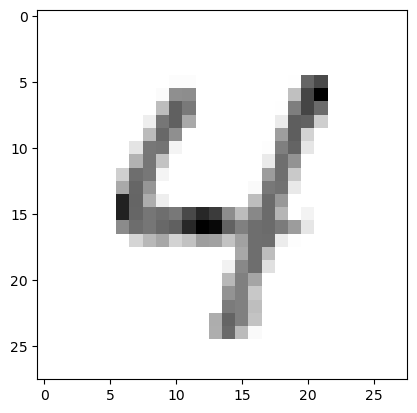

In [22]:
index=randint(0,9999)
print("label",y_test[index])
print("prediction", max([(v, k) for k, v in enumerate(pred[index])])[1])
pyplot.imshow(x_test[index], cmap='gray_r')


References:

https://victorzhou.com/blog/intro-to-neural-networks/

https://github.com/vuptran/introduction-to-neural-networks/blob/master/intro_neural_network.ipynb

https://www.datacamp.com/community/tutorials/deep-learning-python

https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

https://drive.google.com/file/d/1AGuKRLssV0bjXrV7YNzwKGuHUzExS0jF/view

https://github.com/brianspiering/keras-intro/blob/master/keras-intro.ipynb

